In [1]:
import os

import numpy as np
import pandas as pd

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0340(a)(dipxe_text).tif")
img = np.asarray(img)

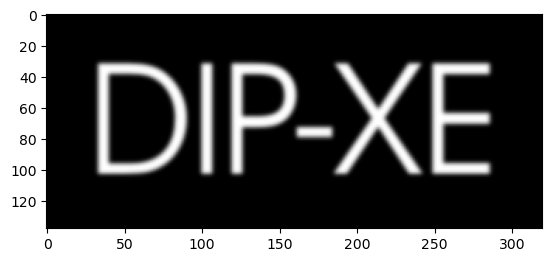

In [4]:
blurred = cv2.GaussianBlur(img, (3, 3), 0)
plt.imshow(blurred, cmap = 'gray')

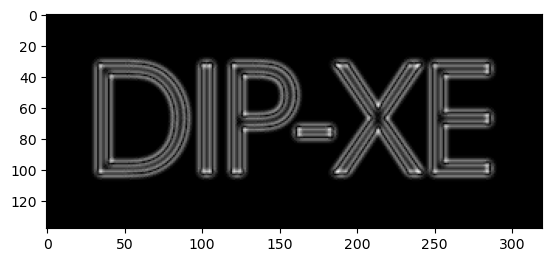

In [11]:
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))
plt.imshow(laplacian, cmap = 'gray')

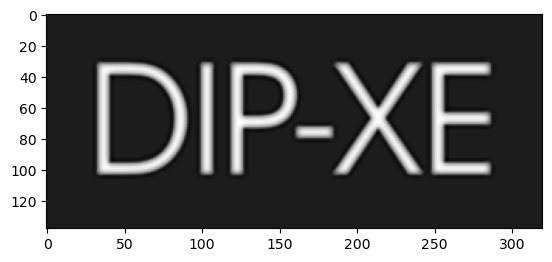

In [13]:
unsharp_mask = cv2.subtract(img, laplacian)
plt.imshow(unsharp_mask, cmap = 'gray')

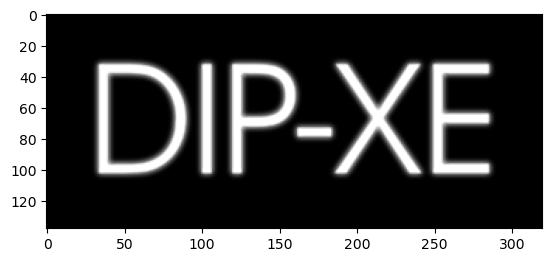

In [14]:
highboost = cv2.addWeighted(img, 2, unsharp_mask, -1, 0)
plt.imshow(highboost, cmap = 'gray')

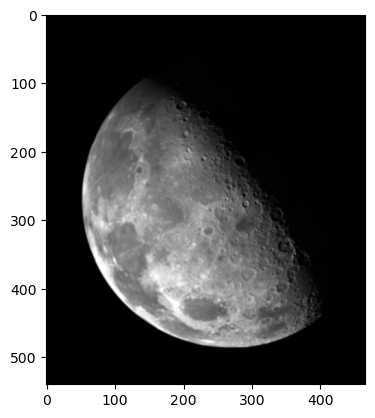

In [16]:
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0338(a)(blurry_moon).tif")
img = np.asarray(img)
plt.imshow(img, cmap = 'gray')

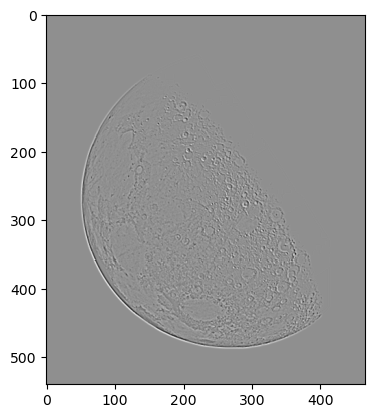

In [17]:
lap_no_scaling = cv2.Laplacian(img, cv2.CV_64F)
plt.imshow(lap_no_scaling, cmap = 'gray')

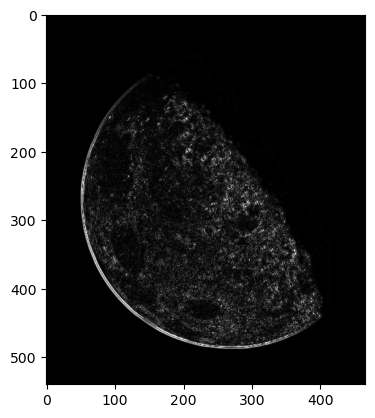

In [18]:
lap_with_scaling = cv2.Laplacian(img, cv2.CV_64F, ksize = 3)
scaled_laplacian = cv2.convertScaleAbs(lap_with_scaling)
plt.imshow(scaled_laplacian, cmap = 'gray')

In [19]:
kernel_a = np.array([[0, 1, 0],
                     [1, -4, 1],
                     [0, 1, 0]], dtype = np.float32)

kernel_b = np.array([[1, 1, 1],
                     [1, -8, 1],
                     [1, 1, 1]], dtype = np.float32)

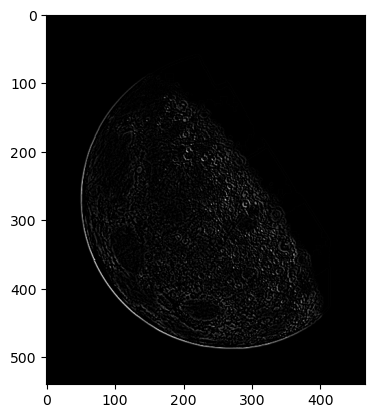

In [20]:
sharpened_a = cv2.filter2D(img, -1, kernel_a)
plt.imshow(sharpened_a, cmap = 'gray')

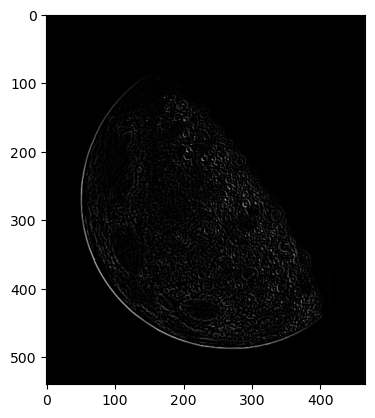

In [21]:
sharpened_b = cv2.filter2D(img, -1, kernel_b)
plt.imshow(sharpened_b, cmap = 'gray')

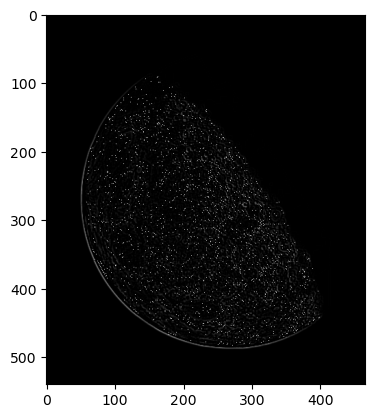

In [22]:
plt.imshow(sharpened_b - sharpened_a, cmap = 'gray')

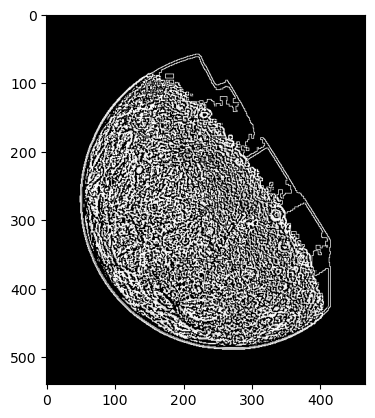

In [23]:
plt.imshow(sharpened_a - sharpened_b, cmap = 'gray')